In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
pip install pandas numpy matplotlib seaborn folium scikit-learn statsmodels


Note: you may need to restart the kernel to use updated packages.


# Synthetic Deforestation data generator

In [2]:

import numpy as np
import pandas as pd

# List of Indian states and union territories
states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", "Haryana", "Himachal Pradesh",
    "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland",
    "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal",
    "Andaman and Nicobar", "Chandigarh", "Dadra and Nagar Haveli" ," Daman and Diu", "Lakshadweep", "Delhi", "Puducherry", "Ladakh",
    "Jammu and Kashmir"
]

# Define years (assuming a range from 1990 to 2024)
years = range(1990, 2024)

# Generate synthetic forest area data (percentage of total land)
forest_data_full = []
for state in states:
    forest_cover = np.linspace(np.random.uniform(30, 50), np.random.uniform(10, 40), len(years)) # Simulating gradual deforestation
    Biodiversity_Impact = np.random.choice(["High", "Medium", "Low"], len(years))
    unique_states = np.unique(states)  # This will be the same as states since they’re all unique
    forest_types_per_state = np.random.choice(["Tropical", "Temperate", "Evergreen", "Deciduous"], len(unique_states))
    state_to_forest = dict(zip(unique_states, forest_types_per_state))
    state_year_combinations = [state for state in states for _ in years]  # Repeats each state 34 times
    forest_type = np.array([state_to_forest[state] for state in state_year_combinations])
    for i, year in enumerate(years):
        forest_data_full.append([year, state, round(forest_cover[i], 2),forest_type[i],Biodiversity_Impact[i]])# Only including forest cover percentage

# Create DataFrame
df_forest_full = pd.DataFrame(forest_data_full, columns=["Year", "State", "Forest_Area_Percentage","Forest_Type","Biodiversity_Impact"])
df_forest_full.to_csv("forest_area_india_full.csv", index=False)

print("File 'forest_area_india_full.csv' has been generated successfully.")




File 'forest_area_india_full.csv' has been generated successfully.


# Synthetic deforestation causes data

In [ ]:
causes = ['Agricultural Expansion', 'Logging', 'Infrastructure Development', 'Wildfire']
deforestation_causes_data_full = []
for state in states_full:
    for i, year in enumerate(years):
        cause_contributions = np.random.uniform(10, 40, len(causes))  # Percentage contribution of each cause
        total_loss = np.random.uniform(0.1, 1.5)  # Annual forest cover loss in percentage
        deforestation_causes_data_full.append([year, state, round(total_loss, 2)] + list(map(round, cause_contributions, [2]*4)))

df_deforestation_causes_full = pd.DataFrame(deforestation_causes_data_full, columns=["Year", "State", "Total_Forest_Loss", "Agriculture", 
                                                                                     "Urbanization", "Mining", "Logging"])
df_deforestation_causes_full.to_csv("deforestation_causes_india_full.csv", index=False)




# Merge all datasets on Year and State

In [ ]:
df_merged = df_forest_full.merge(df_biodiversity_full, on=["Year", "State"])
df_merged = df_merged.merge(df_deforestation_causes_full, on=["Year", "State"])

# Save the merged dataset
merged_file_path = "merged_deforestation_biodiversity_india_full.csv"
df_merged.to_csv(merged_file_path, index=False)

# Provide file path
merged_file_path


In [5]:
import pandas as pd
df = pd.read_csv("merged_deforestation_biodiversity_india_full.csv")
print(df.head())

print(df.info())

   Year           State  Forest_Area_Percentage Forest_Type  \
0  1990  Andhra Pradesh                   49.51   Evergreen   
1  1991  Andhra Pradesh                   48.52   Evergreen   
2  1992  Andhra Pradesh                   47.53   Evergreen   
3  1993  Andhra Pradesh                   46.54   Evergreen   
4  1994  Andhra Pradesh                   45.54   Evergreen   

  Biodiversity_Impact  Biodiversity_Index  Total_Forest_Loss  Agriculture  \
0                 Low               68.80               1.25        18.43   
1                 Low               67.93               0.71        27.90   
2                High               67.06               0.43        23.03   
3                High               66.18               1.46        16.05   
4                 Low               65.31               1.16        37.33   

   Urbanization  Mining  Logging  
0         24.34   38.14    13.82  
1         21.60   34.84    15.99  
2         36.53   34.80    26.83  
3         24.84   

In [7]:
print(df.describe())


              Year  Forest_Area_Percentage  Biodiversity_Index  \
count  1156.000000             1156.000000         1156.000000   
mean   2006.500000               32.043330           60.770735   
std       9.814955                7.943474           10.558557   
min    1990.000000               10.220000           31.350000   
25%    1998.000000               26.557500           54.397500   
50%    2006.500000               32.265000           61.100000   
75%    2015.000000               37.895000           67.905000   
max    2023.000000               49.940000           89.260000   

       Total_Forest_Loss  Agriculture  Urbanization       Mining      Logging  
count        1156.000000  1156.000000   1156.000000  1156.000000  1156.000000  
mean            0.782924    24.602102     24.950718    25.303616    25.210078  
std             0.396443     8.553219      8.528285     8.566024     8.842746  
min             0.100000    10.030000     10.090000    10.070000    10.020000  
25%  

In [27]:
import pandas as pd

# Example: df = pd.read_csv("your_data.csv")

# Find highest and lowest forest loss per year
df_high = df.loc[df.groupby("Year")["Total_Forest_Loss"].idxmax()].copy()
df_low = df.loc[df.groupby("Year")["Total_Forest_Loss"].idxmin()].copy()

# Merge them side by side for clarity
summary = pd.merge(
    df_high[["Year", "State", "Total_Forest_Loss"]],
    df_low[["Year", "State", "Total_Forest_Loss"]],
    on="Year",
    suffixes=("_Highest", "_Lowest")
)

# Rename columns for readability
summary = summary.rename(columns={
    "State_Highest": "Highest_State",
    "Total_Forest_Loss_Highest": "Highest_Loss",
    "State_Lowest": "Lowest_State",
    "Total_Forest_Loss_Lowest": "Lowest_Loss"
})


bold = '\033[1m'
reset = '\033[0m'

print(bold + "Highest and Lowest Total Forest Loss per Year:\n" + reset)
print(summary.to_string(index=False))


Highest and Lowest Total Forest Loss per Year:

 Year     Highest_State  Highest_Loss      Lowest_State  Lowest_Loss
 1990            Sikkim          1.44 Jammu and Kashmir         0.14
 1991        Puducherry          1.50       West Bengal         0.12
 1992               Goa          1.46           Manipur         0.11
 1993    Andhra Pradesh          1.46             Delhi         0.12
 1994    Madhya Pradesh          1.41      Chhattisgarh         0.11
 1995       Lakshadweep          1.47           Tripura         0.14
 1996            Punjab          1.39           Tripura         0.15
 1997        Tamil Nadu          1.42            Sikkim         0.16
 1998    Andhra Pradesh          1.42            Odisha         0.14
 1999               Goa          1.48        Tamil Nadu         0.13
 2000         Meghalaya          1.50        Tamil Nadu         0.14
 2001            Kerala          1.47 Jammu and Kashmir         0.17
 2002            Punjab          1.48            Ladakh

# Visualizing Deforestation and Biodiversity: Trends,Distribution and Insights  

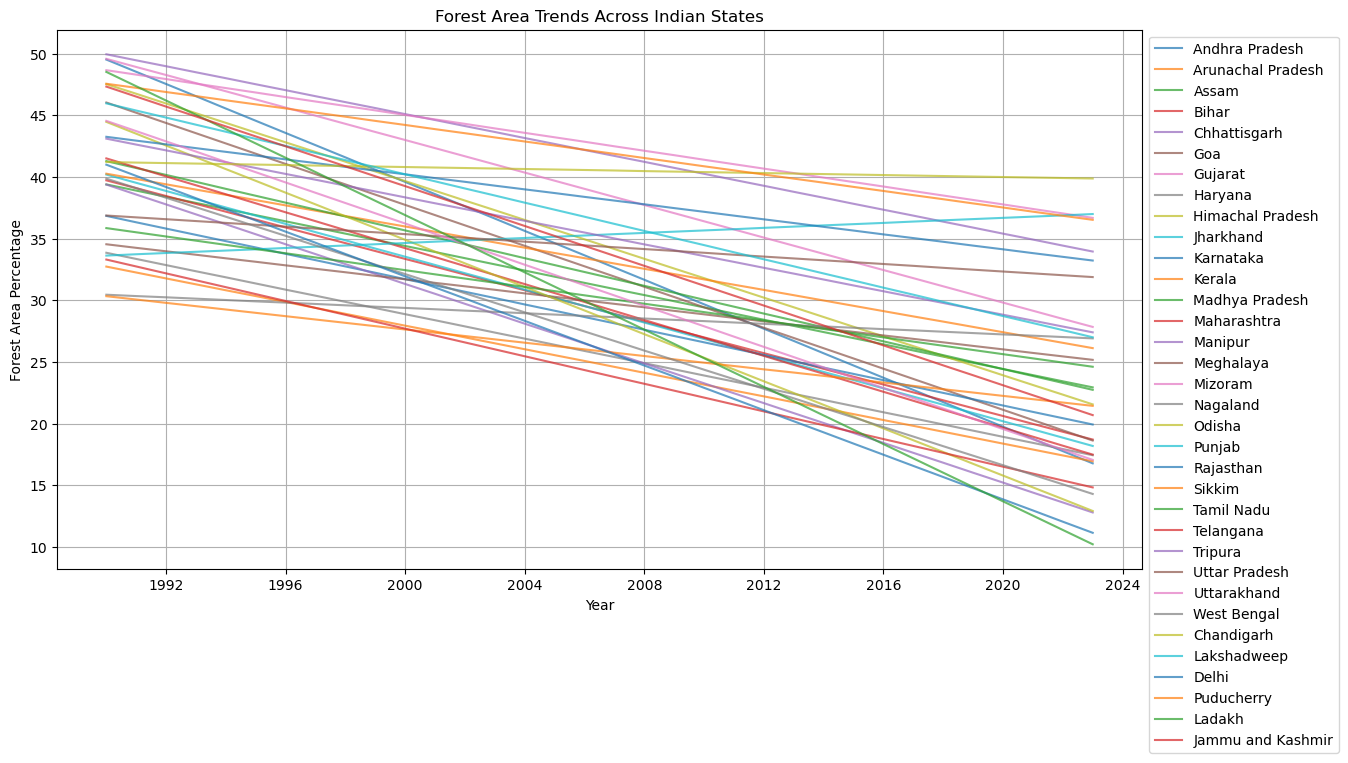

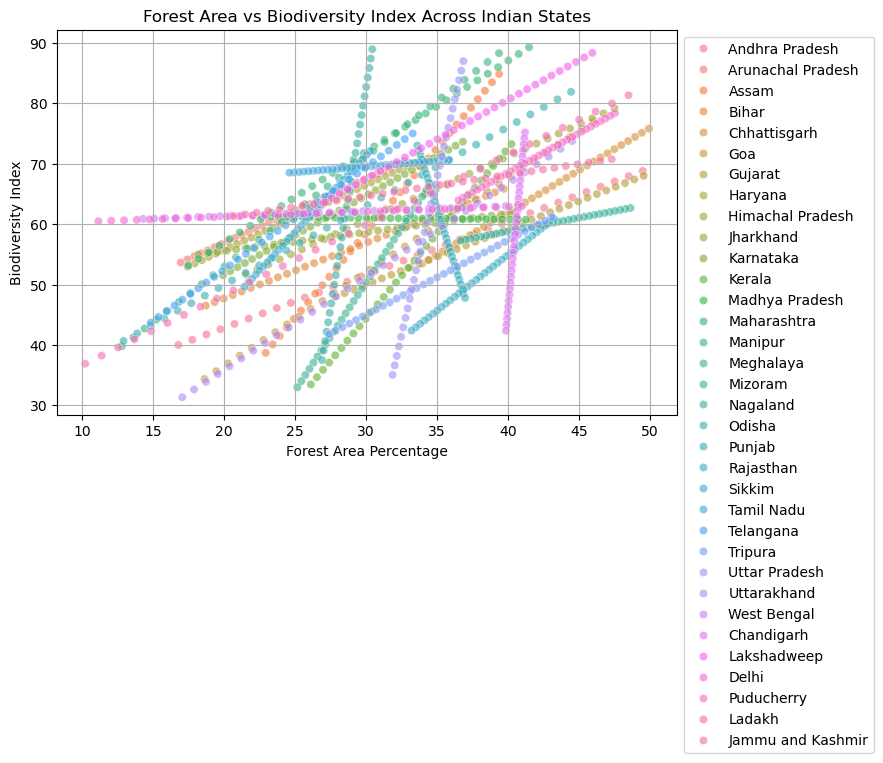

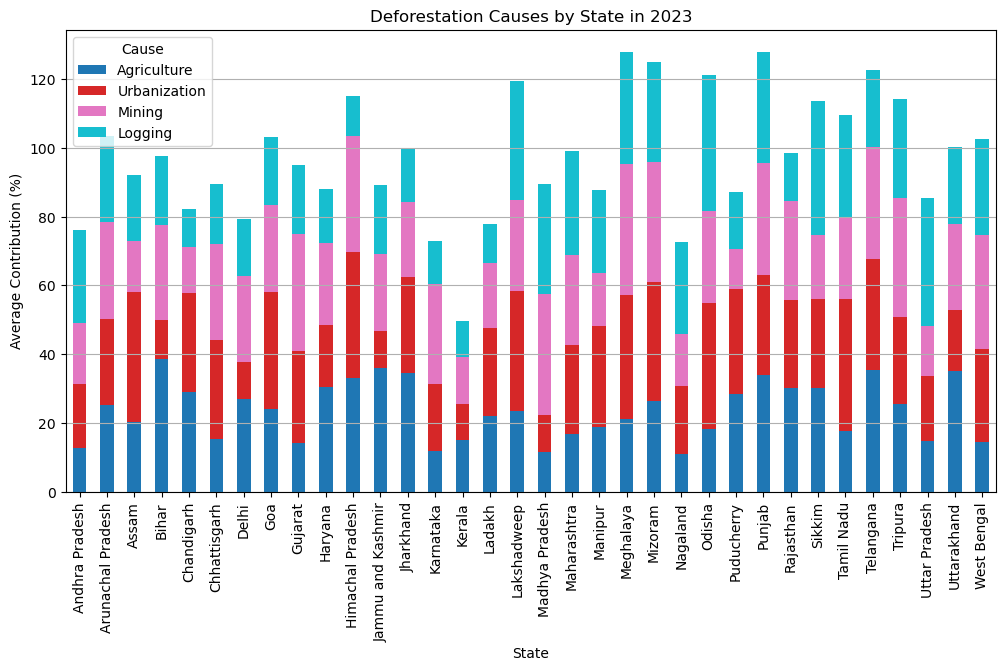

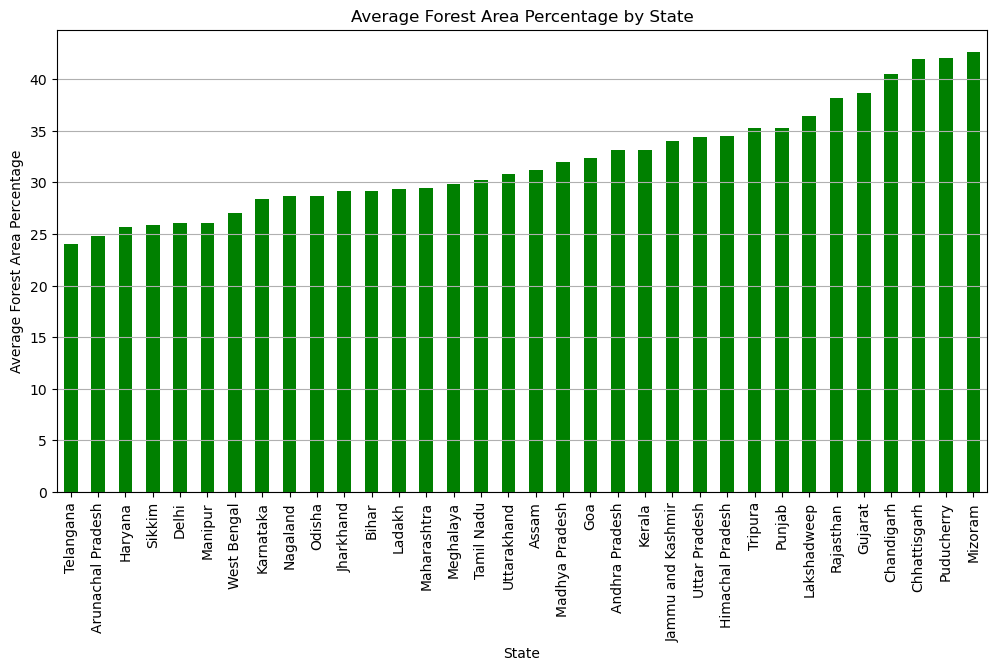

D:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



<Figure size 1400x700 with 0 Axes>

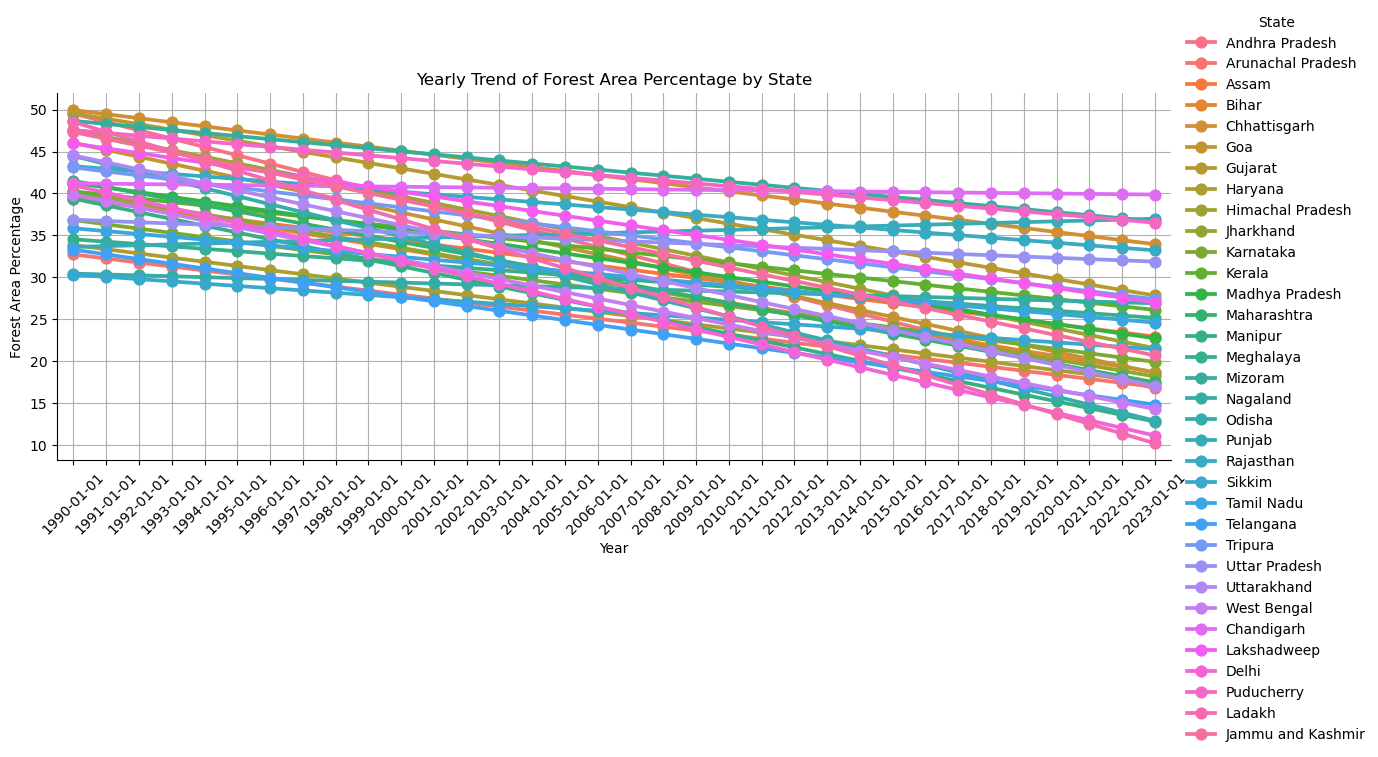

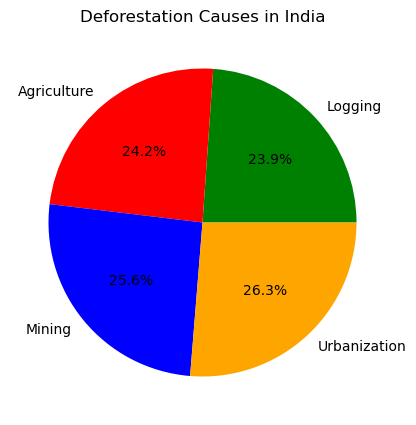

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Merged dataset with all states)
df = pd.read_csv("merged_deforestation_biodiversity_india_full.csv")

# Convert Year to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Define states for visualization (limit to top states for clarity)
states_to_plot = df['State'].unique()

# Set figure size
plt.figure(figsize=(14, 7))

# Plot forest area percentage trends for all states
for state in states_to_plot:
    state_data = df[df['State'] == state]
    sns.lineplot(data=state_data, x='Year', y='Forest_Area_Percentage', label=state, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Forest Area Percentage')
plt.title('Forest Area Trends Across Indian States')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Scatter plot: Forest Area vs Biodiversity Index for all states
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Forest_Area_Percentage', y='Biodiversity_Index', hue='State', alpha=0.6)
plt.xlabel('Forest Area Percentage')
plt.ylabel('Biodiversity Index')
plt.title('Forest Area vs Biodiversity Index Across Indian States')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Bar plot: Average deforestation causes across all states (latest year)
latest_year = df['Year'].dt.year.max()
df_latest = df[df['Year'].dt.year == latest_year]
causes = ["Agriculture", "Urbanization", "Mining", "Logging"]
df_latest_mean = df_latest.groupby('State')[causes].mean()
df_latest_mean.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

plt.xlabel('State')
plt.ylabel('Average Contribution (%)')
plt.title(f'Deforestation Causes by State in {latest_year}')
plt.xticks(rotation=90)
plt.legend(title='Cause')
plt.grid(axis='y')
plt.show()

# Bar chart: Average forest area percentage by state over time
plt.figure(figsize=(12, 6))
avg_forest_area = df.groupby('State')['Forest_Area_Percentage'].mean().sort_values()
avg_forest_area.plot(kind='bar', color='green')

plt.xlabel('State')
plt.ylabel('Average Forest Area Percentage')
plt.title('Average Forest Area Percentage by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Catplot: Yearly trend of forest area percentage by state
plt.figure(figsize=(14, 7))
sns.catplot(x='Year', y='Forest_Area_Percentage', hue='State', kind='point', data=df, height=6, aspect=2)
plt.xlabel('Year')
plt.ylabel('Forest Area Percentage')
plt.title('Yearly Trend of Forest Area Percentage by State')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# pie chart 
causes = ["Agriculture", "Urbanization", "Mining", "Logging"]
df_latest_mean = df_latest[causes].mean().sort_values()

# Create a pie chart
plt.figure(figsize=(8, 5))
df_latest_mean.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue', 'orange'])
plt.title(f'Deforestation Causes in India')
plt.show()

In [5]:
pip install dash

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 8.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.0 MB 2.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.6 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 2.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.0 MB 1.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.0 MB 1.9 MB/s eta 0:00:03
   --------------------- ------------------ 4.2/8.0 MB 2.0 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.0 MB 2.0 MB/s eta 0

# Correlational analysis Deforestation and Biodiversity

Correlation Matrix:
                        Forest_Area_Percentage  Biodiversity_Index  \
Forest_Area_Percentage                1.000000            0.506480   
Biodiversity_Index                    0.506480            1.000000   
Total_Forest_Loss                     0.004031           -0.019099   
Agriculture                           0.035710            0.011949   
Urbanization                          0.005658           -0.036801   
Mining                                0.012087            0.013986   
Logging                              -0.003659            0.047048   

                        Total_Forest_Loss  Agriculture  Urbanization  \
Forest_Area_Percentage           0.004031     0.035710      0.005658   
Biodiversity_Index              -0.019099     0.011949     -0.036801   
Total_Forest_Loss                1.000000     0.028491     -0.020526   
Agriculture                      0.028491     1.000000      0.030258   
Urbanization                    -0.020526     0.030258     

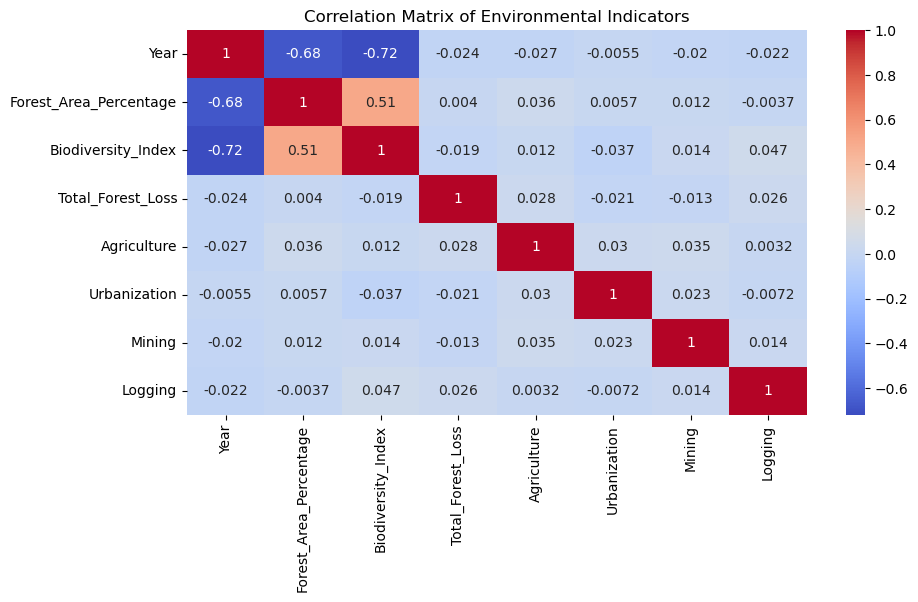

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: df = pd.read_csv("your_data.csv")

# Select only numeric columns
numeric_cols = [
    "Forest_Area_Percentage",
    "Biodiversity_Index",
    "Total_Forest_Loss",
    "Agriculture",
    "Urbanization",
    "Mining",
    "Logging"
]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# --- Heatmap Visualization ---
plt.figure(figsize=(10, 5))

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Environmental Indicators")
plt.show()


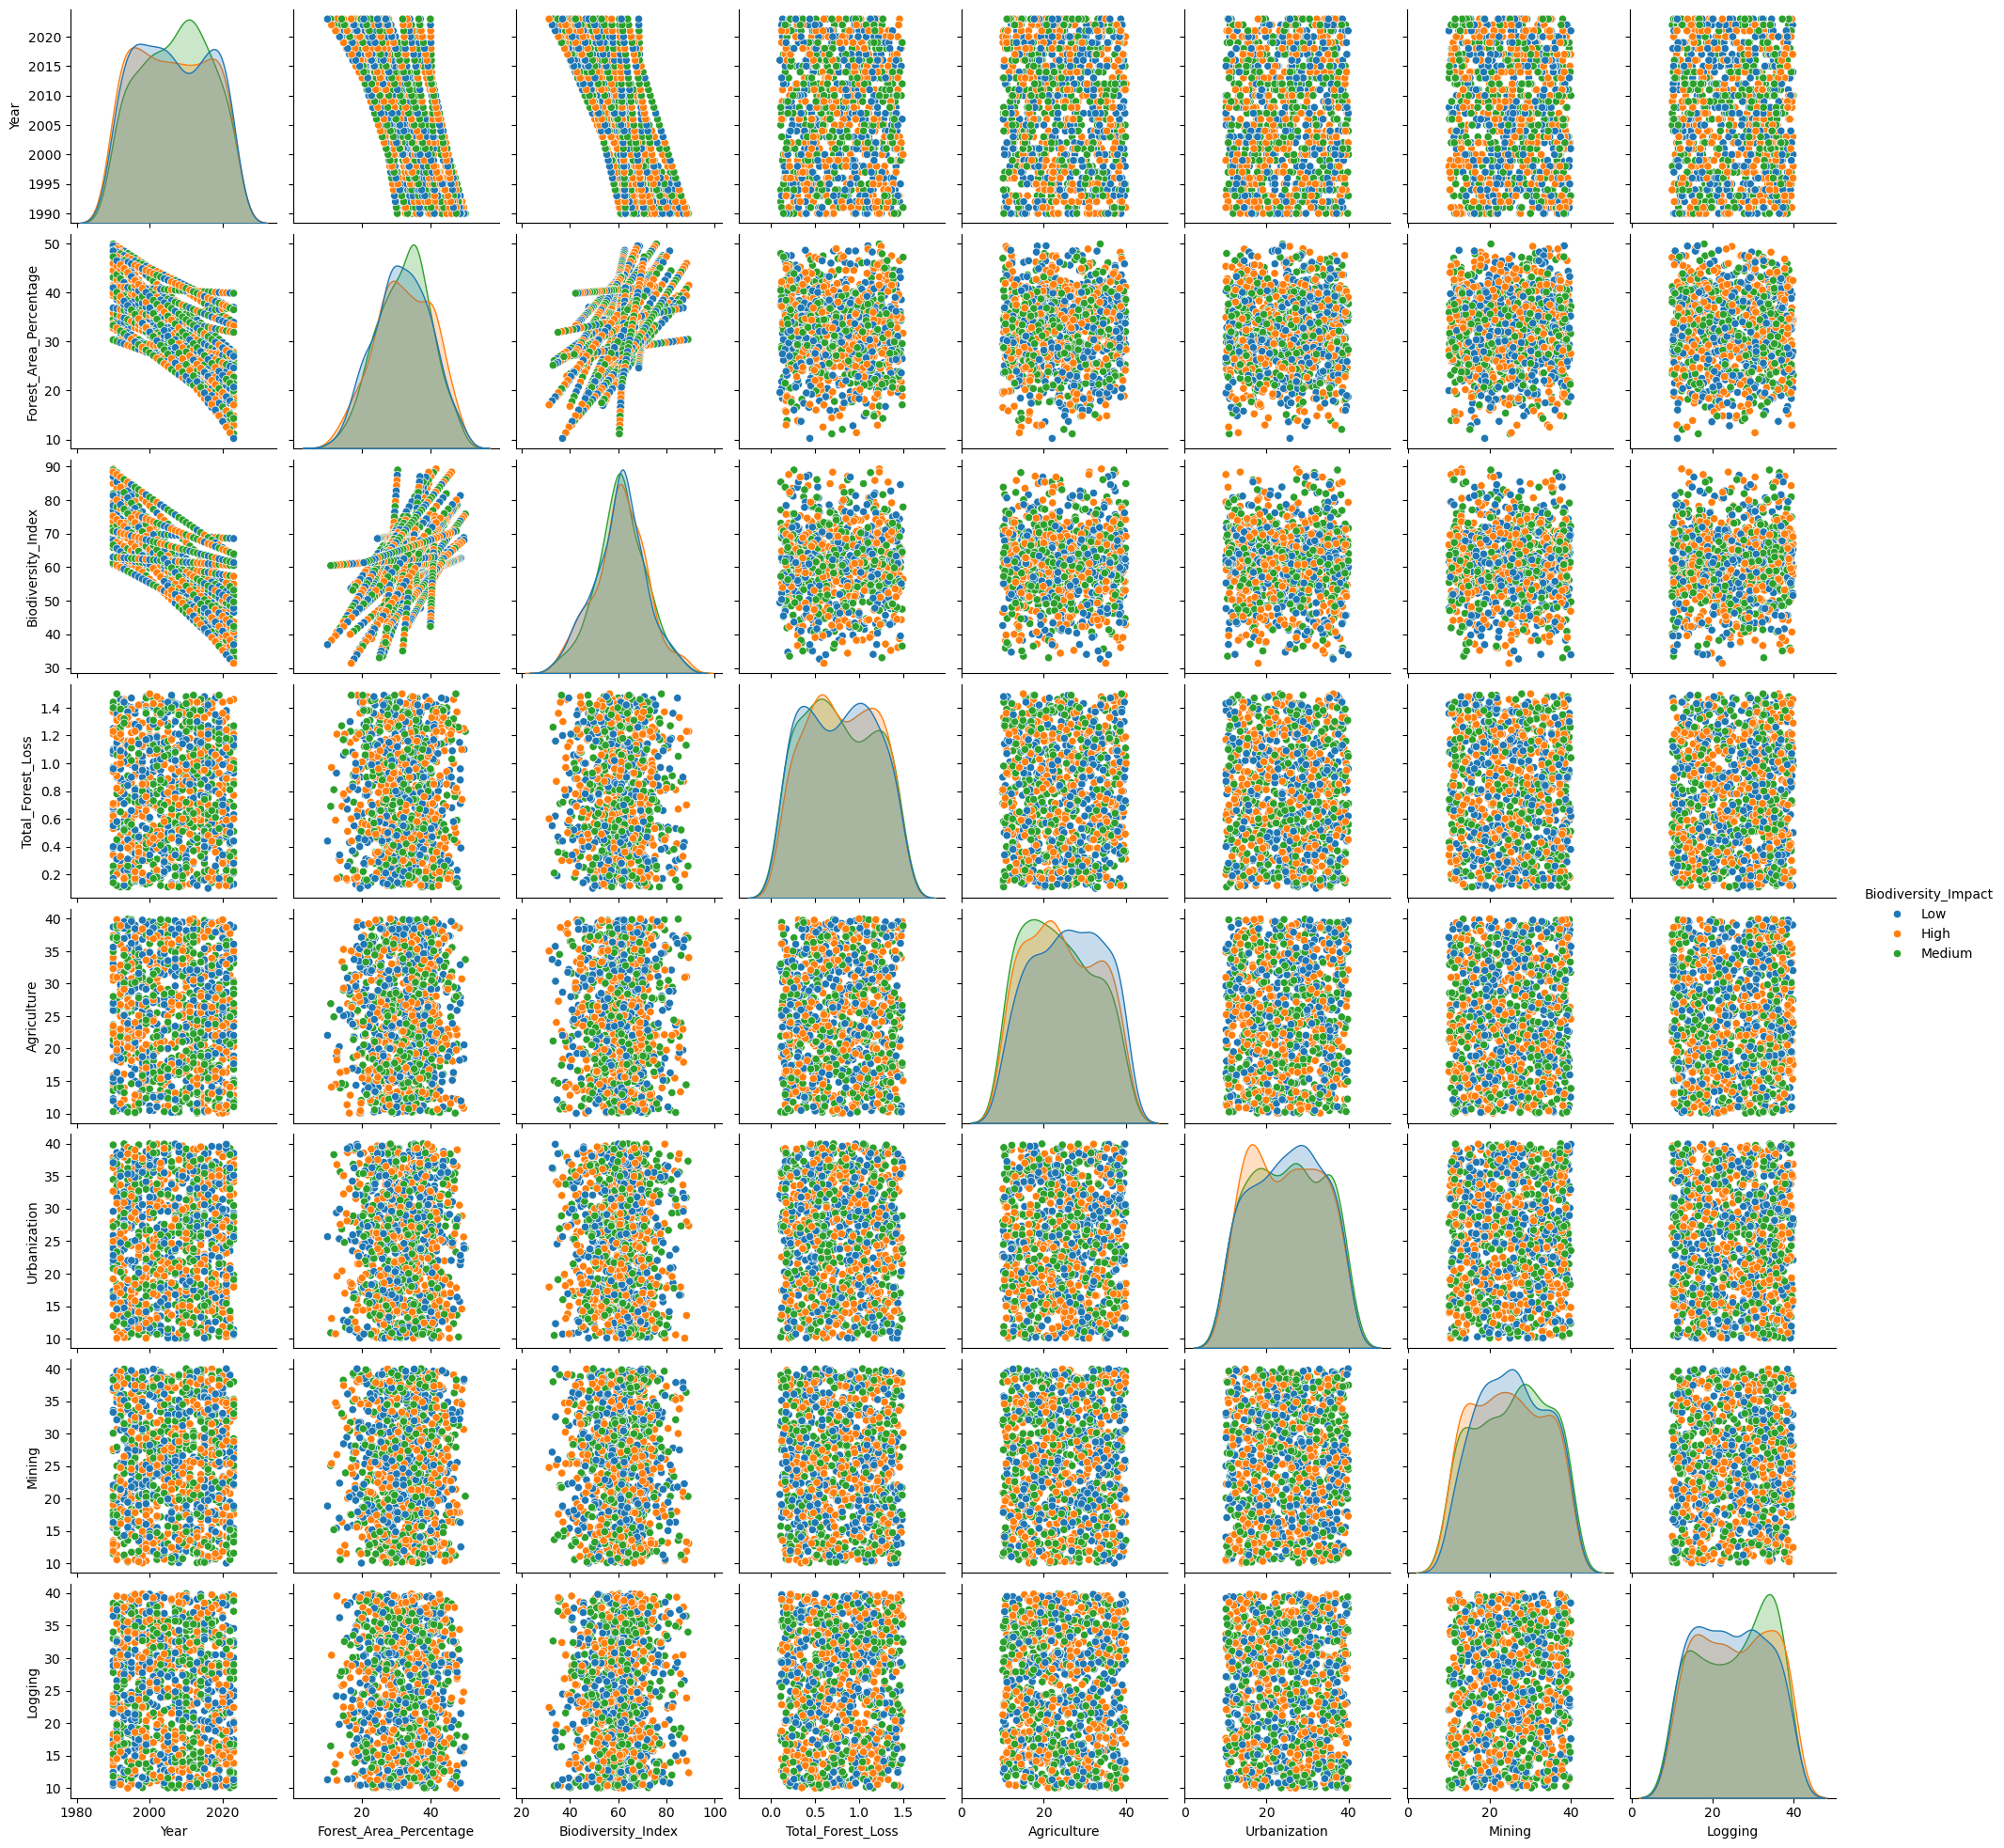

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("merged_deforestation_biodiversity_india_full.csv")

sns.pairplot(data, hue="Biodiversity_Impact")
plt.show()


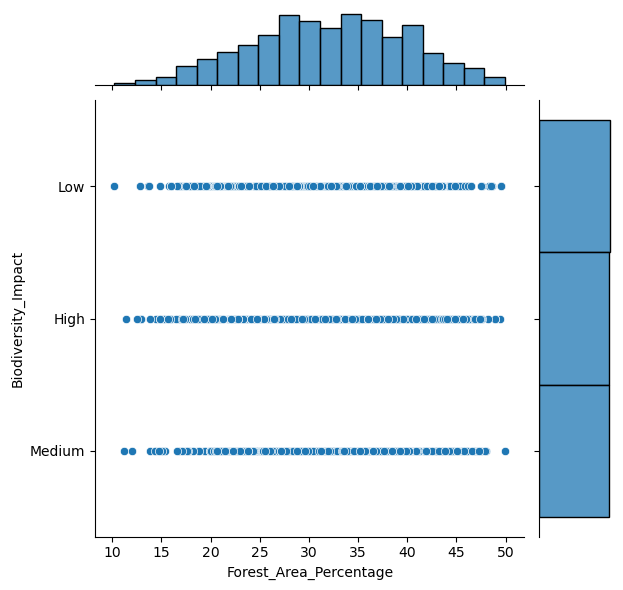

In [11]:
causes = ["Agriculture", "Urbanization", "Mining", "Logging"]
data = pd.read_csv("merged_deforestation_biodiversity_india_full.csv")
sns.jointplot(y="Biodiversity_Impact", x="Forest_Area_Percentage", data=data, kind="scatter")
plt.show()

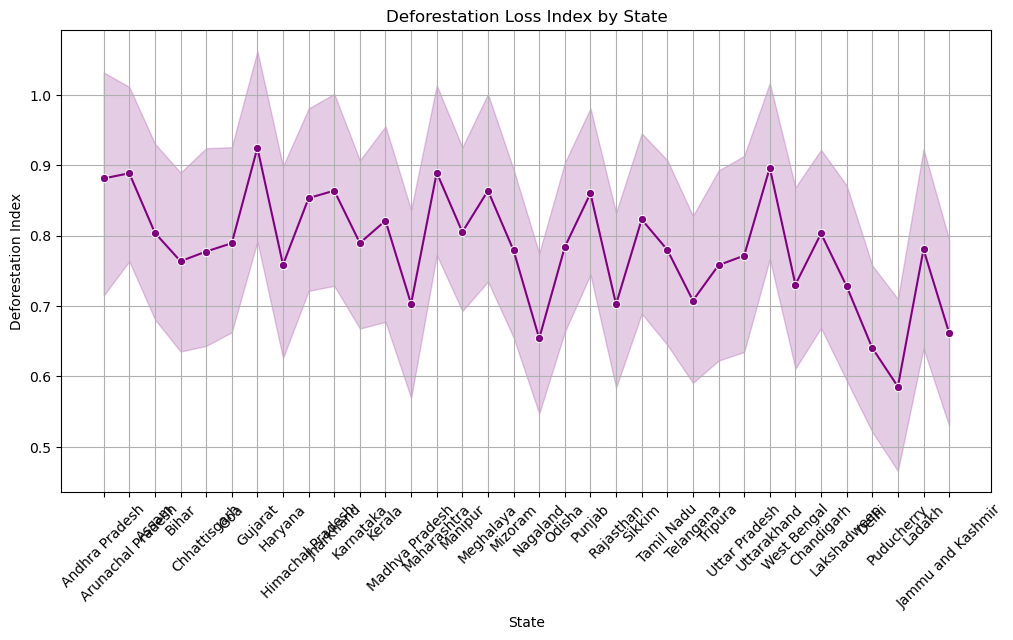

In [13]:
#line plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("merged_deforestation_biodiversity_india_full.csv")
plt.figure(figsize=(12, 6))

# Create a line plot for Biodiversity Index
sns.lineplot(data, x="State", y="Total_Forest_Loss", marker="o", color="purple")

plt.title("Deforestation Loss Index by State")
plt.xlabel("State")
plt.ylabel("Deforestation Index")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add a grid for better readability
plt.show()